# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

# Import API key
from config import api_key

#print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



607


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Retrieve articles

city_names = cities
city_weather = []
weather = {'City':[], 
           'Lat':[], 
            'Lng':[],
            'Max Temp':[],
            'Humidity':[],
           'Cloudiness':[],
           'Wind Speed':[],
           'Country':[],
           'Date':[]
             }
i=0
for city_name in city_names:
    #try:
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=imperial&appid={api_key}"
    result = requests.get(query_url).json()
    #print(result)
    
    if 'coord' in result:  #Used this to check for missing cities, but will switch to the try/except method
        
        city_weather.append(result)
        print(f"Retrieving weather data for city number {city_names.index(city_name)+1}:  {city_name}")
        number = city_names.index(city_name)+1
        
        name = city_weather[i]['name']
        lat = city_weather[i]['coord']['lat']
        lng = city_weather[i]['coord']['lon']
        cur_temp = city_weather[i]['main']['temp']
        max_temp = city_weather[i]['main']['temp_max']
        hum = city_weather[i]['main']['humidity']
        clouds = city_weather[i]['clouds']['all']
        wind = city_weather[i]['wind']['speed']
        country = city_weather[i]['sys']['country']
        date = city_weather[i]['dt']
    
        weather['City'].append(name)
        weather['Lat'].append(lat) 
        weather['Lng'].append(lng) 
        weather['Max Temp'].append(max_temp) 
        weather['Humidity'].append(hum) 
        weather['Cloudiness'].append(clouds) 
        weather['Country'].append(country) 
        weather['Wind Speed'].append(wind)
        weather['Date'].append(date) 
        i+=1
    
    else: 
        print(f"{city_name} not found, skip this one")
    
      

#print(number,name, lat, hum, clouds, wind, country, date)

#print (result)   


#pprint(city_weather)




Retrieving weather data for city number 1:  thompson
Retrieving weather data for city number 2:  harsud
Retrieving weather data for city number 3:  bissau
Retrieving weather data for city number 4:  kasangulu
Retrieving weather data for city number 5:  mataura
Retrieving weather data for city number 6:  rikitea
Retrieving weather data for city number 7:  saint-philippe
Retrieving weather data for city number 8:  brae
Retrieving weather data for city number 9:  klaksvik
Retrieving weather data for city number 10:  punta arenas
Retrieving weather data for city number 11:  qiongshan
Retrieving weather data for city number 12:  albany
Retrieving weather data for city number 13:  hofn
Retrieving weather data for city number 14:  hobart
Retrieving weather data for city number 15:  jamestown
Retrieving weather data for city number 16:  esperance
Retrieving weather data for city number 17:  sao filipe
Retrieving weather data for city number 18:  cockburn town
Retrieving weather data for city n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
weather_df = pd.DataFrame(weather)
weather_df.to_csv("output_data/cities.csv", index = False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,-9.40,76,90,6.93,CA,1608678085
1,Harsūd,22.10,76.73,56.55,39,88,4.03,IN,1608678085
2,Bissau,11.86,-15.60,73.40,64,97,5.68,GW,1608678045
3,Kasangulu,-4.59,15.17,78.80,83,20,4.70,CD,1608678085
4,Mataura,-46.19,168.86,60.01,93,100,3.00,NZ,1608678086
...,...,...,...,...,...,...,...,...,...
551,El Copé,8.62,-80.60,80.60,88,20,8.50,PA,1608678163
552,Emerald,-23.53,148.17,80.60,65,40,17.22,AU,1608678163
553,Bahía Blanca,-38.72,-62.27,86.00,42,40,11.41,AR,1608678105
554,Rodney,42.57,-81.68,37.40,69,97,6.93,CA,1608678163


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
len(weather_df)
for i in range(len(weather_df)):
    if weather_df['Humidity'][i] > 100:
        print(i)
        print(weather_df['Humidity'][i])
        
        weather_df.drop(index=i)

clean_city_data = weather_df        
len(clean_city_data)
clean_city_data.rename(columns = {'Lat': 'Latitude'}, inplace = True)





In [6]:
clean_city_data.head()


,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,-9.40,76,90,6.93,CA,1608678085
1,Harsūd,22.10,76.73,56.55,39,88,4.03,IN,1608678085
2,Bissau,11.86,-15.60,73.40,64,97,5.68,GW,1608678045
3,Kasangulu,-4.59,15.17,78.80,83,20,4.70,CD,1608678085
4,Mataura,-46.19,168.86,60.01,93,100,3.00,NZ,1608678086


In [7]:
#Define function for making  scatter plots

def make_scatter_plot(df, x_col, y_col):
    "This creates a scatter plot given a list of x values, y values, x label, y label and title"
    x = df[x_col]
    y = df[y_col]
    
    plt.scatter(x, y)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} as a function of {x_col}")
    plt.savefig(f"{x_col}_{y_col}.png")
    plt.ylim(min(y)-10,max(y)+10)
    
    linregress(x,y)
    reg = linregress(x,y)
    reg_line = reg[0]*x + reg[1]

    plt.plot(x,reg_line, color="red")
    r_squared = round(reg[2]**2,2)
    print(f"r squared = {r_squared}")
              


## Latitude vs. Temperature Plot

r squared = 0.55


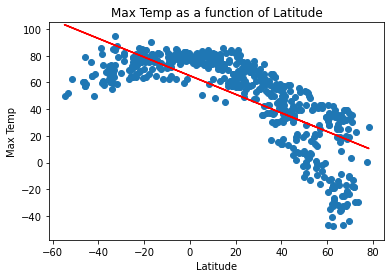

In [8]:
make_scatter_plot(clean_city_data, 'Latitude', 'Max Temp')


## Latitude vs. Humidity Plot

r squared = 0.03


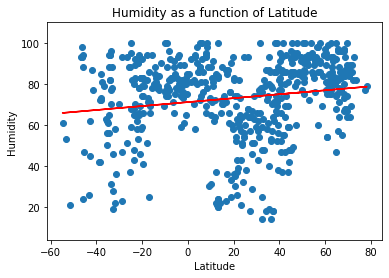

In [9]:
make_scatter_plot(clean_city_data,'Latitude','Humidity')

## Latitude vs. Cloudiness Plot

r squared = 0.01


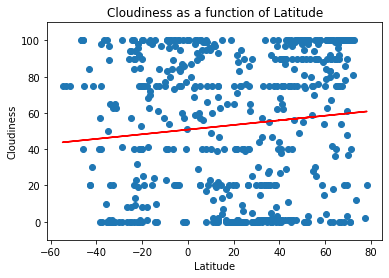

In [10]:
make_scatter_plot(clean_city_data,'Latitude','Cloudiness')

## Latitude vs. Wind Speed Plot

r squared = 0.01


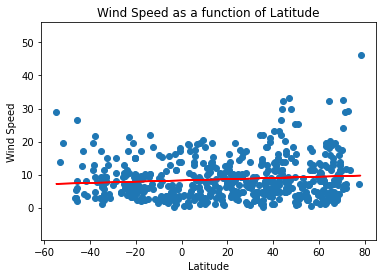

In [11]:
make_scatter_plot(clean_city_data, 'Latitude','Wind Speed')

## Linear Regression

In [12]:
clean_city_data.head()
north = clean_city_data[clean_city_data['Lng']>0]
north.head()
len(north)

south = clean_city_data[clean_city_data['Lng']<0]
south.head()
len(south)    

231

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r squared = 0.6


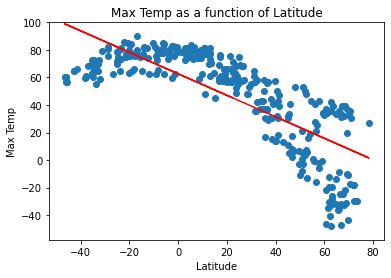

In [13]:
make_scatter_plot(north, 'Latitude','Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r squared = 0.55


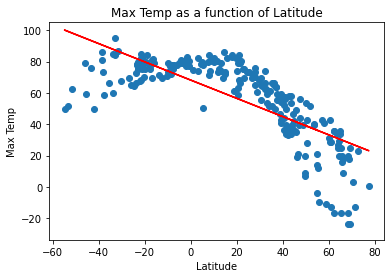

In [14]:
make_scatter_plot(south, 'Latitude','Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r squared = 0.05


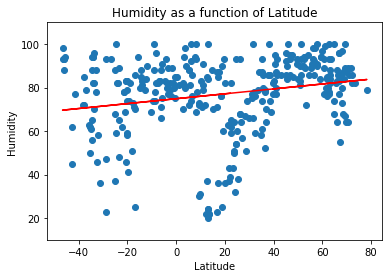

In [15]:
make_scatter_plot(north, 'Latitude','Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r squared = 0.02


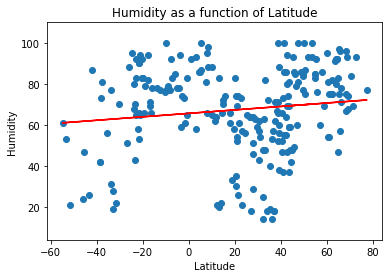

In [16]:
make_scatter_plot(south, 'Latitude','Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r squared = 0.01


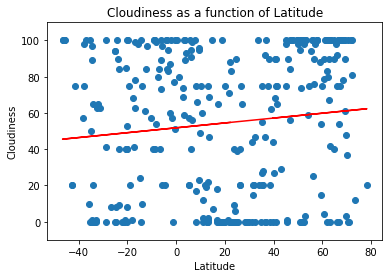

In [17]:
make_scatter_plot(north, 'Latitude','Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r squared = 0.01


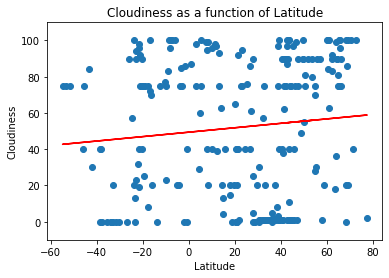

In [18]:
make_scatter_plot(south, 'Latitude','Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r squared = 0.0


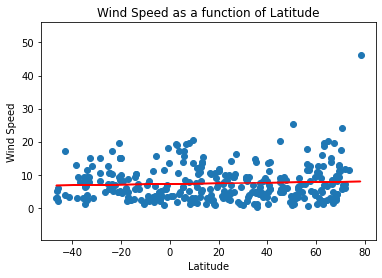

In [19]:
make_scatter_plot(north, 'Latitude','Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r squared = 0.02


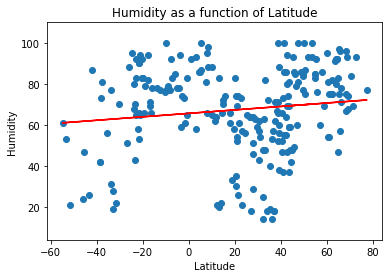

In [20]:
make_scatter_plot(south, 'Latitude','Humidity')

Convert latitude to abs value to see if raw distance from equator is linear  temp

In [21]:
abs_lat = np.absolute(clean_city_data['Latitude'])
clean_abs = clean_city_data
clean_abs['Abs Latitude'] = abs_lat

r squared = 0.67


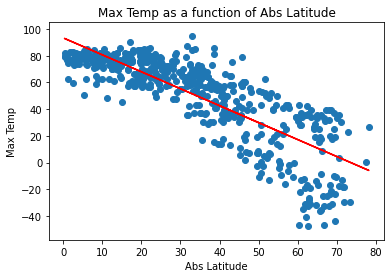

In [22]:

make_scatter_plot(clean_abs,'Abs Latitude','Max Temp')
